# Анализ рынка видеоигр
## Описание проекта

Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представлены данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель проекта
Выявить определяющие успешность игры закономерности


### Задачи проекта

Провести исследовательский анализ данных и ответить на вопросы:
- Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 
- За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 
- Что можно сказать о самых прибыльных жанрах?
- Выделяются ли жанры с высокими и низкими продажами?

Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### План решения задачи

- [Обзор данных](#section_2)
- [Предобработка данных](#section_3)
- [Анализ данных](#section_4)
    - [Распределение игр по годам](#section_4_1)
    - [Анализ платформ](#section_4_2)
    - [Зависимость продаж от оценок](#section_4_3)
    - [Анализ продаж по рынкам](#section_4_4)
    - [Проверка гипотез](#section_4_5)
- [Общие выводы](#section_5)

<a id='section_2'></a>
## Обзор данных

Импортируем `pandas`, `matplotlib` и `seaborn`

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

Прочитаем файл `games.csv`

In [5]:
df=pd.read_csv('/datasets/games.csv')

Выведем информацию о таблице

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что есть пропуски. Названия столбцов лучше перевести в нижний регистр. С этим разберёмся на этапе предобработки данных. `User_Score` и `Critic_Score` почему-то имеют строковый тип, хотя логичнее числовой. Посмотрим на первые 5 строк

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Согласно заданию, в таблице содержится следующая информация:
Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sale` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Выводы

Файл прочитался без проблем. Столбцы соответсвуют заявленным. В таблице присутствуют пропуски, с которыми требуется разобраться. Названия столбцов неплохо бы перевести в нижний регистр.

<a id='section_3'></a>
## Предобработка данных

Для удобства работы приведём названия столбцов к нижнему регистру

In [8]:
df.columns = df.columns.str.lower()

Проверим на явные дубликаты

In [9]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Для начала посмотрим на пропуски в ключевом столбце `name`

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Нет ни имени, ни жанра, ни рейтингов. Установить игру достаточно сложно, опираясь только на данные о продаже. Поэтому логично удалить эти записи, тем более, что записей всего 2. Удалим и перезагрузим индекс.

In [12]:
df = df.dropna(subset = ['name']).reset_index(drop=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Записей уменьшилось на 2. Теперь посмотрим, что с годами

In [14]:
df['year_of_release'].value_counts(dropna=False).sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: year_of_release, dtype: int64

Получили распределние по годам. Присутствуют 269 пропусков. Взглянем на них

In [15]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В принципе можно установить, в каком году была выпущена игра на основании названия и платформы. Но для всех записей это сделать не быстро. Для нас такой задачи не стоит, поэтому заполним пропупуски -1 и приведём к целому типу для удобства

In [16]:
df['year_of_release'] = df['year_of_release'].fillna(-1).astype('int64')

Посмотрим на каких платформах выпускались игры

In [17]:
df['platform'].value_counts(dropna=False)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Некоторые платформы встречаются только 1-2 раза. А некоторые имеют достаточно большое число записей-выпущенных игр.

Посмотрим на продажи по регионам. В Северной Америке:

In [18]:
df['na_sales'].sort_values()

16712     0.00
8065      0.00
13311     0.00
3718      0.00
13312     0.00
         ...  
2        15.68
5        23.20
9        26.93
1        29.08
0        41.36
Name: na_sales, Length: 16713, dtype: float64

В Европе

In [19]:
df['eu_sales'].sort_values()

16712     0.00
12658     0.00
12659     0.00
10313     0.00
12661     0.00
         ...  
19        9.20
3        10.93
10       10.95
2        12.76
0        28.96
Name: eu_sales, Length: 16713, dtype: float64

В Японии

In [20]:
df['na_sales'].sort_values()

16712     0.00
8065      0.00
13311     0.00
3718      0.00
13312     0.00
         ...  
2        15.68
5        23.20
9        26.93
1        29.08
0        41.36
Name: na_sales, Length: 16713, dtype: float64

В других странах:

In [21]:
df['other_sales'].sort_values()

8356      0.00
12248     0.00
12249     0.00
12250     0.00
12251     0.00
         ...  
2         3.29
16        3.96
48        7.53
0         8.45
17       10.57
Name: other_sales, Length: 16713, dtype: float64

Отрицательных значений нет. Это уже хорошо. Для дальнейшего анализа создадим столбец `total_sales` с суммаными продажами.

In [22]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [23]:
df['total_sales'].sort_values()

16674     0.00
16707     0.00
16179     0.01
16178     0.01
16177     0.01
         ...  
4        31.38
3        32.77
2        35.52
1        40.24
0        82.54
Name: total_sales, Length: 16713, dtype: float64

Всё вышло. Видим, что продажи изменяются от 0 до 82.54 млн.копий.

Пасмотрим на столбец `critic_score`

In [24]:
df['critic_score'].sort_values(ascending=False)

51       98.0
227      98.0
5349     98.0
57       98.0
97       97.0
         ... 
16708     NaN
16709     NaN
16710     NaN
16711     NaN
16712     NaN
Name: critic_score, Length: 16713, dtype: float64

Оценки содержат пропуски и максимум имеют 98 из 100. Посмотрим сводную информацию о столбце

In [25]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Минимальная оценка 13. Максимальная 98. Пропуски в столбце могли возникнуть из-за того, что критики не оценивали игру, либо информацию просто не внесли в таблицу.

In [26]:
df['critic_score'] = df['critic_score'].fillna(-1)

Посмотрим на столбец с `user_score`

In [27]:
df['user_score'].sort_values(ascending=False)

16704    tbd
10147    tbd
10145    tbd
10144    tbd
10143    tbd
        ... 
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, Length: 16713, dtype: object

In [28]:
df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.2       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Видим, что достаточно много пропусков и много значений `tbd`, что значит *to be determined* (будет определён).

Посмотрим на статистику столбца. Для этого сделаем выборку из значений, которые не имеют пропуски и не равны *tbd* и переведём в *flaot64*

In [29]:
df.loc[(df['user_score'].notna()) & (df['user_score']!='tbd')]['user_score'].astype('float64').describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [30]:
df['user_score'] = df['user_score'].fillna(-1)

In [31]:
df.loc[df['user_score']=='tbd', 'user_score'] = -1

Теперь переведём в тип *float64*

In [32]:
df['user_score'] = df['user_score'].astype('float64')

Посмотрим на столбец `rating`

In [33]:
df['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Есть пропуски в рейтинге и их достаточно много. Заменим их на строковое значение *NR (no rating)*. Рейтинг *K-A* аналогичен рейтингу *E* (согласно википедии). А рейтинг *RP* присуждается только для рекламных презентаций. Его можно заменить на определённый исходя из данных в открытых источниках, но пока оставим как есть.

In [34]:
df['rating'] = df['rating'].fillna('NR')

In [35]:
df.loc[df['rating']=='K-A', 'rating'] = 'E'

Посмотрим на результат.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски убрали. Типы привели к удобныйм.

### Выводы

В ходе предобрадотки данных установили, что явных дубликатов нет. Пропуски в названии игр удалили (2 записи). Пропуски в годах выпуска заменили на -1. Пропуски в оценках заменили медианными значениями. Добавили столбцы-индикаторы произведения таких замен. Для рейтингов пропуски заменили на *NR (no rating)* и рейтинг *K-A* заменили на *E*.

<a id='section_4'></a>
## Анализ данных
<a id='section_4_1'></a>
### Распределение игр по годам

Определим, сколько игр выпускалось в разные годы. Для удобства значения отразим на гистограмме. Те записи, для которых не был указан год выпуска не включим в диапазон.

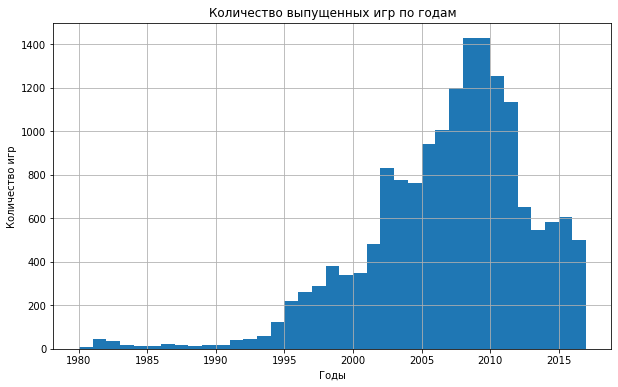

In [37]:
hist = df['year_of_release'].hist(bins=37,range=(1980,2017), figsize= (10,6))
hist.set_xlabel('Годы')
hist.set_ylabel("Количество игр")
plt.title('Количество выпущенных игр по годам')
plt.show()

Количество игр по платформам возрастало с 1990 года до 2009. Затем наблюдается некоторый спад. Важны ли данные за весь период? Скорее всего нет. Большую роль играет окружение пользователей, насколько изменились технологии и среда. Игры, которые были на пике популярности в 90-е годы сейчас не смогут конкурировать с современными по уровню графики например.

Посмотрим, как менялись продажи по платформам в различные годы. Для это построим сделаем сводную талицу по платформам и годам и суммируем количество продаж. Затем построи *heatmap* с разбиением по годам

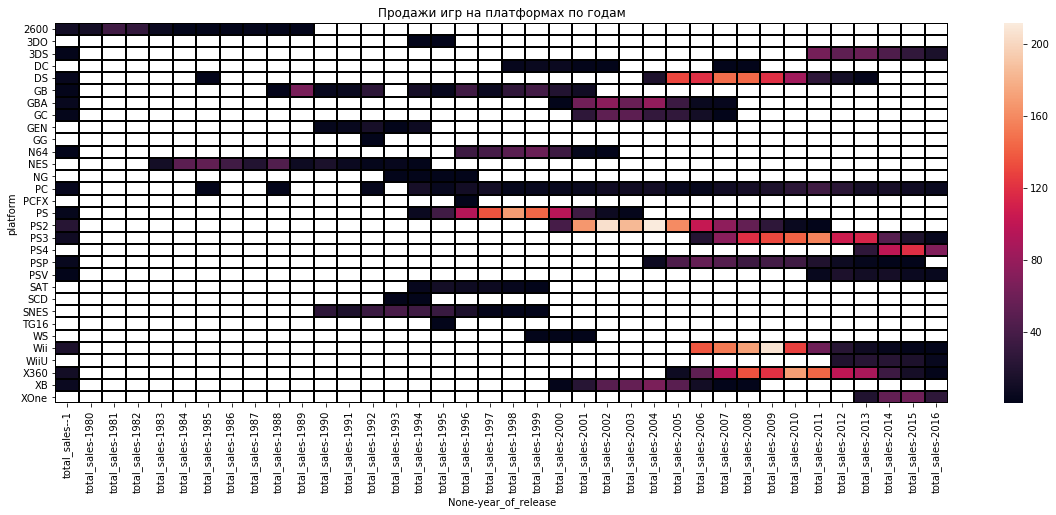

In [38]:
fig, heat = plt.subplots(figsize = (20,7))
heat = sns.heatmap(pd.pivot_table(df, values=['total_sales'], index=df['platform'], columns=df['year_of_release'], aggfunc='sum'), linewidths = 1, linecolor = 'black')
plt.title('Продажи игр на платформах по годам');

Видим, что есть определённые периоды популярности платформ. Посмотрим, какие платформы имеют наибольшее число продаж за все годы.

In [39]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Наиболее популярные платформы - PS2, X360 и т.д. Построим график распределения для PS2. 

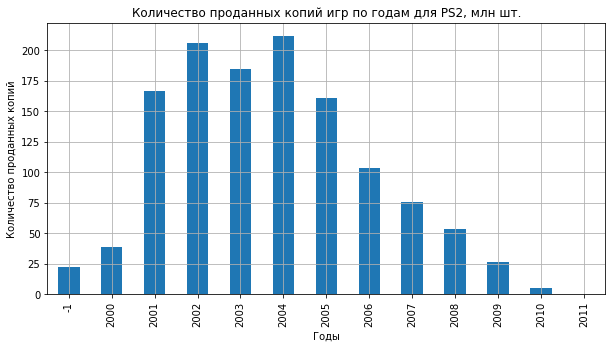

In [40]:
fig, bar1 = plt.subplots(figsize = (10,5))
bar1 = df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True)
plt.title('Количество проданных копий игр по годам для PS2, млн шт.')
bar1.set_xlabel('Годы')
bar1.set_ylabel("Количество проданных копий")
plt.show()

Аналогично и для X360

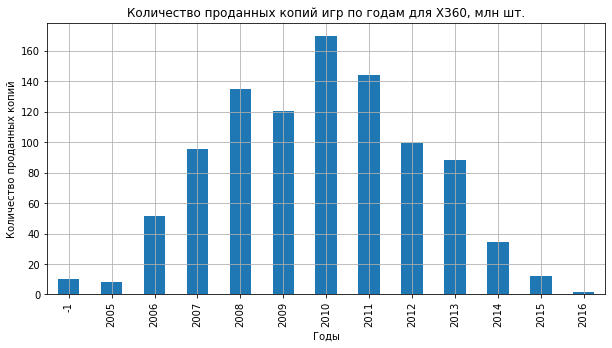

In [41]:
fig, bar1 = plt.subplots(figsize = (10,5))
bar1 = df[df['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True)
plt.title('Количество проданных копий игр по годам для X360, млн шт.')
bar1.set_xlabel('Годы')
bar1.set_ylabel("Количество проданных копий")
plt.show()

-1 на графике соответствует играм, у которых не указан год выпуска на платформе.

<a id='section_4_2'></a>
### Анализ платформ
Попробуем определить, какой срок жизни имеют платформы. Для этого сгруппируем названия игр по платформам и годам

In [42]:
df_life =  df[df['year_of_release']>0].groupby(['platform','year_of_release'])['name'].count()

In [43]:
df_life

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
                             ..
XB        2008                1
XOne      2013               19
          2014               61
          2015               80
          2016               87
Name: name, Length: 238, dtype: int64

Теперь сбросим индекс

In [44]:
df_life=df_life.reset_index()

In [45]:
df_life

,platform,year_of_release,name
0,2600,1980,9
1,2600,1981,46
2,2600,1982,36
3,2600,1983,11
4,2600,1984,1
...,...,...,...
233,XB,2008,1
234,XOne,2013,19
235,XOne,2014,61
236,XOne,2015,80


Теперь сгруппируем по платформам и от максимального значения года отнимем минимальное. Изначально мы не учитывали записи с пропуском в поле год выпуска. Могли конечно просто посчитать к-во лет в группировке по платформам, но есть ситуации, когда в определённый год не выпускались игры для платформы, а годом ранее и годом позже выпускались. Также добавим единицу к записи. Так при выпуске игр для платформы с 2010 по 2012 год считаем что платформа жила 3 года.

In [46]:
df_life.groupby('platform')['year_of_release'].max()-df_life.groupby('platform')['year_of_release'].min()+1

platform
2600    10
3DO      2
3DS      6
DC      11
DS      29
GB      14
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      32
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

Выведем основные показатели. 

In [47]:
(df_life.groupby('platform')['year_of_release'].max()-df_life.groupby('platform')['year_of_release'].min()+1).describe()

count    31.000000
mean      8.612903
std       6.998464
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      32.000000
Name: year_of_release, dtype: float64

Видим, что в среднем платформы живут порядка 9 лет. При этом есть как платформы - одногодки, так и ветераны.

Период в 9 лет выглядит правдоподобным при определении актуальности платформ. Таким образом сформируем таблицу, которая будет включать данные только с 2009 года. Тогда 2017 будет входить в средний срок жизни платформ, выпущенных (если они были) в 2009 году.

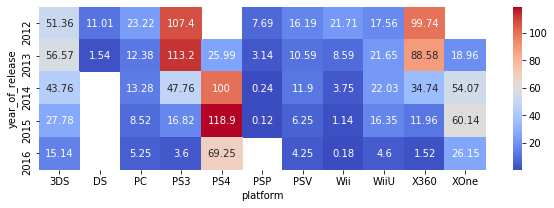

In [48]:

platform_sales_pivot = df.query('year_of_release >= 2012').pivot_table(index = 'year_of_release', columns = 'platform', 
                  values = 'total_sales', aggfunc = 'sum')
plt.figure(figsize = (10, 3))
sns.heatmap(platform_sales_pivot, annot = True, fmt='.4g', cmap = "coolwarm")
plt.show()

In [49]:
df_actual=df[df['year_of_release']>=2012]

In [50]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NR,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [51]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16712
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       2886 non-null float64
user_score         2886 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


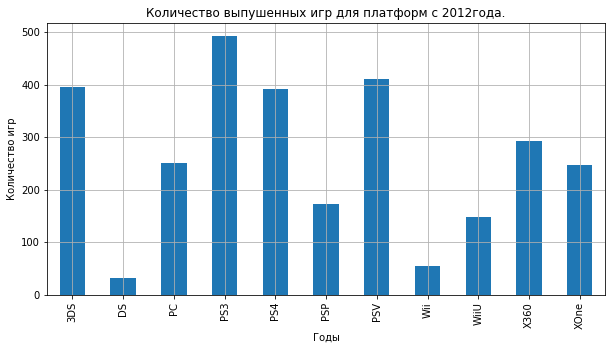

In [52]:
fig, plot = plt.subplots(figsize = (10,5))
df_actual.groupby('platform')['name'].count().plot(kind='bar', grid=True)
plt.title('Количество выпушенных игр для платформ с 2012года.')
plot.set_xlabel('Годы')
plot.set_ylabel("Количество игр")
plt.show()

Посмотрим, какие платформы за актуальный период как изменяются

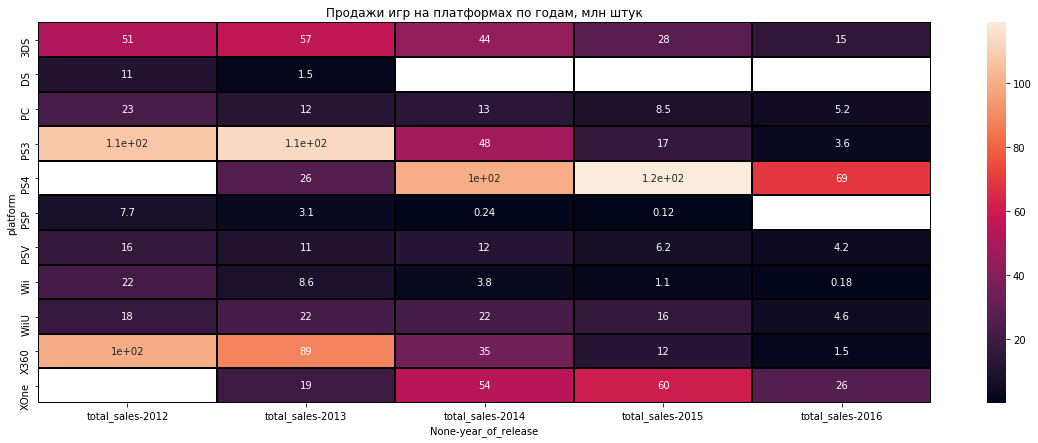

In [53]:
fig, heat = plt.subplots(figsize = (20,7))
heat = sns.heatmap(pd.pivot_table(df_actual, values=['total_sales'], 
                                  index=df_actual['platform'],
                                  columns=df_actual['year_of_release'],
                                  aggfunc='sum'),
                   linewidths = 1, linecolor = 'black', annot=True)
heat.set_title('Продажи игр на платформах по годам, млн штук');

In [54]:
df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

По продажам лидирует PS3, затем X360. Продажи практически на всех платформах падают в абсолютных значениях. Посмотрим на данные в процентном соотношении. Для этого сгруппируем суммарные продажи по платформам и сбросим индекс.

In [55]:
df_temp = df_actual.groupby(['year_of_release','platform'])['total_sales'].sum()

In [56]:
df_temp = df_temp.reset_index()

In [57]:
df_temp

,year_of_release,platform,total_sales
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69
5,2012,PSV,16.19
6,2012,Wii,21.71
7,2012,WiiU,17.56
8,2012,X360,99.74
9,2013,3DS,56.57


Объявим функцию, которая будет определять отношения продаж на платформе к суммарным продажам за год на всех платформах

In [58]:
def ratio (x):
    year_of_release=x['year_of_release']
    total = df_temp[df_temp['year_of_release']== year_of_release]['total_sales'].sum()
    return x['total_sales']/total

In [59]:
df_temp['ratio'] = df_temp.apply(ratio, axis = 1)

In [60]:
df_temp.head()

,year_of_release,platform,total_sales,ratio
0,2012,3DS,51.36,0.144335
1,2012,DS,11.01,0.030941
2,2012,PC,23.22,0.065254
3,2012,PS3,107.36,0.301709
4,2012,PSP,7.69,0.021611


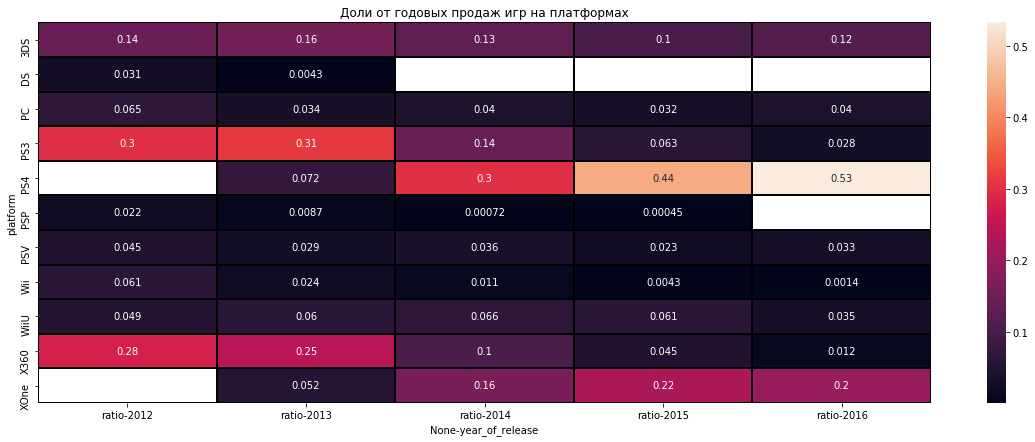

In [61]:
fig, heat = plt.subplots(figsize = (20,7))
heat = sns.heatmap(pd.pivot_table(df_temp, values=['ratio'],
                                  index=df_temp['platform'],
                                  columns=df_temp['year_of_release'],
                                  aggfunc='sum'), linewidths = 1, linecolor = 'black', annot = True)
heat.set_title('Доли от годовых продаж игр на платформах');

По диаграмме види, что с 2014 по 2016 год лидирует PS4, чья доля выросла к 2016 до 53%. На втором месте XOne, чья доля изменилась до 20% в 2016 году. Если планировать на 2017 год, то большая вероятность, что первые места по продажам поделят PS4, XOne и 3DS. Интересно, что у PS4 в процентном отношении выросли продажи, хоть в абсолютных цифрах и уменьшились.

Построим диаграммы размаха продаж игр по платформам в год за актуальный период.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


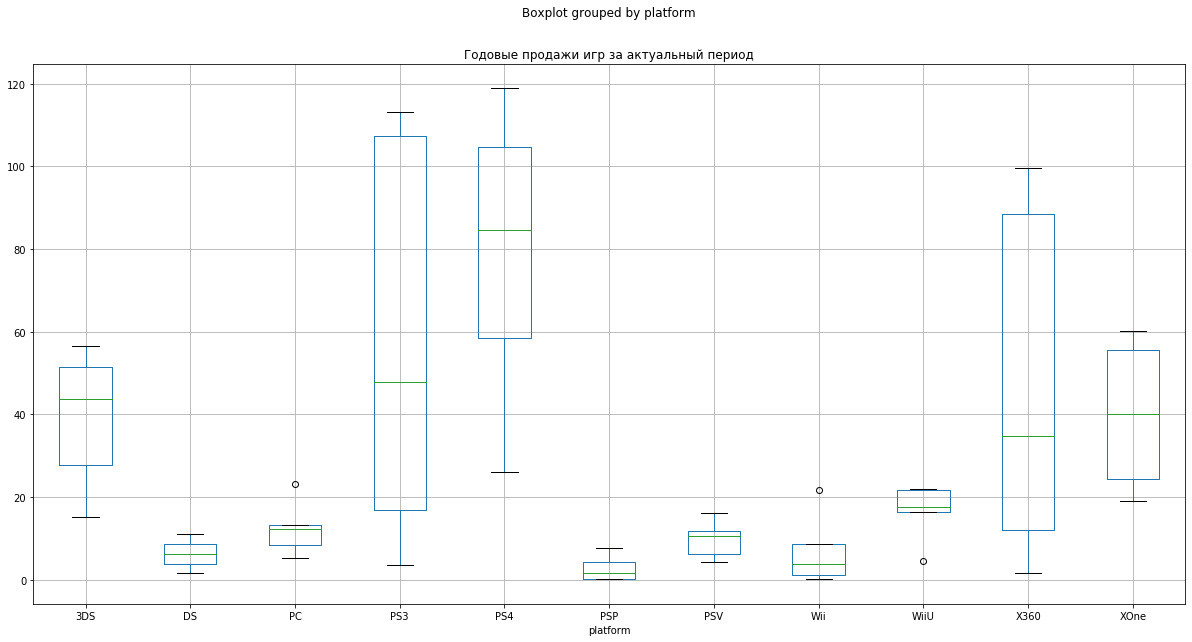

In [62]:
df_temp.boxplot(column='total_sales', by='platform', figsize=(20,10))
plt.title('Годовые продажи игр за актуальный период')
plt.show()

Видим, что за актуальный период (с 2012 года) в год больше всего продаж в год имели PS3, PS4 и X360. По предыдущей тепловой карте видим, что максимумы их продаж приходились на разные годы. Медиана больше всего у PS4, затем PS4 и XOne.

<a id='section_4_3'></a>
### Зависимость продаж от оценок

Построим зависимость объёма продаж от оценок пользователей для одной популярной платформы. Например PS3. При этом не будем учитывать записи с пропущенными оценками пользователей.

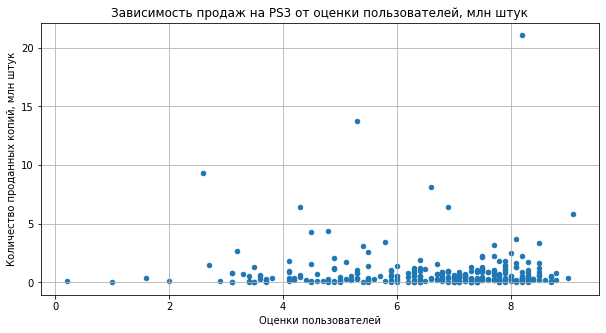

In [63]:
condition = 'platform == \'PS3\' and user_score!=-1'
plot=df_actual.query(condition).plot.scatter('user_score', 'total_sales', figsize=(10,5), grid=True)
plot.set_xlabel('Оценки пользователей')
plot.set_ylabel("Количество проданных копий, млн штук")
plt.title('Зависимость продаж на PS3 от оценки пользователей, млн штук');

Зависимость явно не просматривается. Найдём корреляцию

In [64]:
df_actual.query(condition)['user_score'].corr(df_actual.query(condition)['total_sales'])

-0.005143522887113815

Связь не обнаружена

Посмотрим влияние оценки критиков.

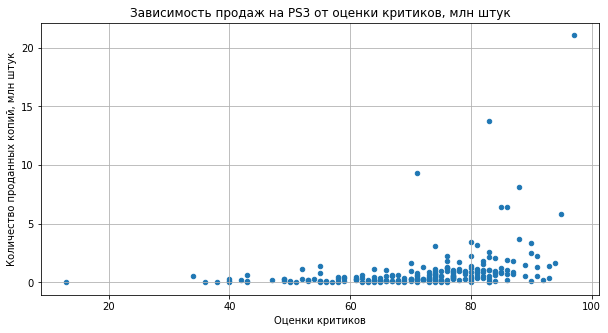

In [65]:
condition = 'platform == \'PS3\' and critic_score!=-1'
plot=df_actual.query(condition).plot.scatter(
    'critic_score', 'total_sales', figsize=(10,5), grid=True)
plot.set_xlabel('Оценки критиков')
plot.set_ylabel("Количество проданных копий, млн штук")
plt.title('Зависимость продаж на PS3 от оценки критиков, млн штук');

In [66]:
df_actual.query(condition)['critic_score'].corr(df_actual.query(condition)['total_sales'])

0.3314972592629587

Здесь зависимость продаж от оценки сильнее, но тоже слабая.

При таком учёте зависимость несколько усиливается. Делаем вывод, что на продажи больше влияют оценики критиков, чем пользователей. 

Посмотрим на зависимость для других платформа. Для PS4:

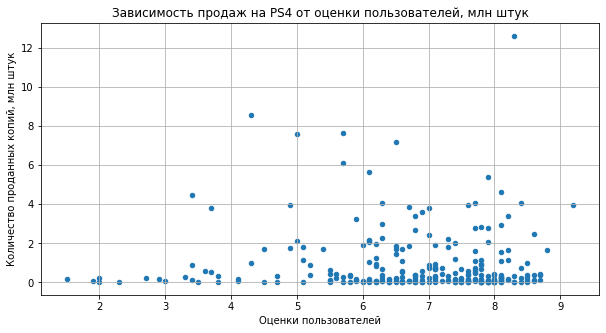

In [67]:
condition = 'platform == \'PS4\' and user_score!=-1'
plot = df_actual.query(condition).plot.scatter('user_score', 'total_sales', figsize=(10,5), grid=True )
plot.set_xlabel('Оценки пользователей')
plot.set_ylabel("Количество проданных копий, млн штук")
plt.title('Зависимость продаж на PS4 от оценки пользователей, млн штук');

In [68]:
df_actual.query(condition)['user_score'].corr(df_actual.query(condition)['total_sales'])

-0.031957110204556424

Нет связи. Посмотрим на оценки критиков.

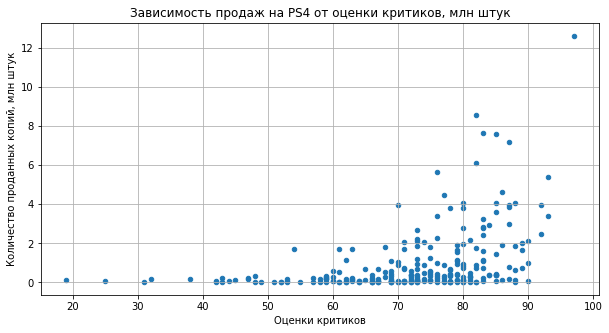

In [69]:
condition = 'platform == \'PS4\' and critic_score!=-1'
plot = df_actual.query(condition).plot.scatter('critic_score', 'total_sales', figsize=(10,5), grid=True)
plot.set_xlabel('Оценки критиков')
plot.set_ylabel("Количество проданных копий, млн штук")
plt.title('Зависимость продаж на PS4 от оценки критиков, млн штук');

In [70]:
df_actual.query(condition)['critic_score' ].corr(df_actual.query(condition)['total_sales'])

0.40656790206178095

Связь имеется. Теперь аналогично для XOne

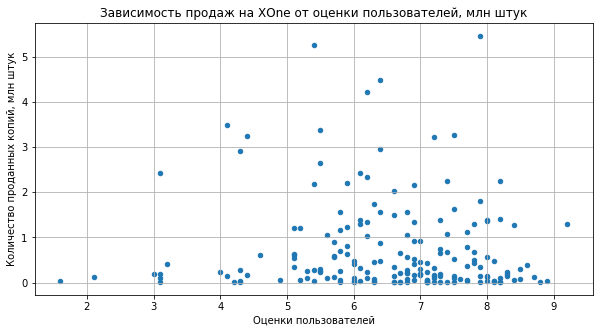

In [71]:
condition = 'platform == \'XOne\' and user_score!=-1'
plot = df_actual.query(condition).plot.scatter('user_score', 'total_sales', figsize=(10,5), grid=True )
plot.set_xlabel('Оценки пользователей')
plot.set_ylabel("Количество проданных копий, млн штук")
plt.title('Зависимость продаж на XOne от оценки пользователей, млн штук');

In [72]:
df_actual.query(condition)['user_score'].corr(df_actual.query(condition)['total_sales'])

-0.06892505328279414

Связи нет.

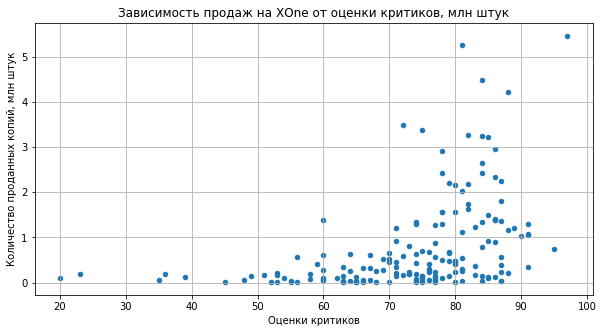

In [73]:
condition = 'platform == \'XOne\' and critic_score!=-1'
plot = df_actual.query(condition).plot.scatter('critic_score', 'total_sales', figsize=(10,5), grid=True)
plot.set_xlabel('Оценки критиков')
plot.set_ylabel("Количество проданных копий, млн штук")
plt.title('Зависимость продаж на XOne от оценки критиков, млн штук');

In [74]:
df_actual.query(condition)['critic_score' ].corr(df_actual.query(condition)['total_sales'])

0.4169983280084017

Зависимость может и не очень сильная, но явно сильнее, чем зависимость от оценок пользователей. Это актуально для всех рассмотренных платформ.

Посмотрим на распределение игр по жанрам за актуальный период

In [75]:
df_actual.groupby('genre').agg({'name':'count', 'total_sales':['median', 'mean']}).sort_values(by=('total_sales', 'median'))

name total_sales          
             count      median      mean
genre                                   
Adventure      302       0.030  0.097450
Puzzle          28       0.045  0.174643
Strategy        71       0.080  0.187887
Action        1031       0.120  0.427856
Misc           192       0.120  0.442917
Simulation      80       0.120  0.439000
Fighting       109       0.130  0.408165
Racing         115       0.140  0.465217
Role-Playing   370       0.140  0.521081
Platform        85       0.210  0.717647
Sports         268       0.240  0.675634
Shooter        235       0.440  1.296723

Самые популярные жанры по медиане проданных копий - это Shooter, Sports и Platform. Самые непопулярные - Adventure, Puzzle, Strategy.

<a id='section_4_4'></a>
### Анализ продаж по рынкам

Выведем самые топ-5 самых популярных платформ в Северной Америке. Выводим результат в процентном соотношении ко всем объёмам продаж.

In [76]:
df_actual.groupby('platform').agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False).head()/df_actual['na_sales'].sum()

,na_sales
platform,
X360,0.236983
PS4,0.184003
PS3,0.174933
XOne,0.157571
3DS,0.093592


Для Европы

In [77]:
df_actual.groupby('platform').agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False).head()/df_actual['eu_sales'].sum()

,eu_sales
platform,
PS4,0.278383
PS3,0.210844
X360,0.147034
XOne,0.101792
3DS,0.084132


Для Японии

In [78]:
df_actual.groupby('platform').agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False).head()/df_actual['jp_sales'].sum()

,jp_sales
platform,
3DS,0.455862
PS3,0.183249
PSV,0.109253
PS4,0.082875
WiiU,0.067556


Самая популярная в Северной Америке.- X360, в Европе - PS4, в Японии 3DS.  Посмотрим на самые популярные жанры.

В Северной Америке:

In [79]:
df_actual.groupby('genre').agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False).head()/df_actual['na_sales'].sum()

,na_sales
genre,
Action,0.300929
Shooter,0.244970
Sports,0.137960
Role-Playing,0.108297
Misc,0.064623


В Европе:

In [80]:
df_actual.groupby('genre').agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False).head()/df_actual['eu_sales'].sum()

,eu_sales
genre,
Action,0.314392
Shooter,0.223886
Sports,0.136321
Role-Playing,0.095754
Racing,0.053846


В Японии

In [81]:
df_actual.groupby('genre').agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False).head()/df_actual['jp_sales'].sum()

,jp_sales
genre,
Role-Playing,0.339807
Action,0.274172
Misc,0.066777
Simulation,0.054055
Fighting,0.049019


Посмотрим на жанры на глобальном рынке

In [82]:
df_actual.groupby('genre').agg({'total_sales':'sum'}).sort_values(
    by='total_sales', ascending=False).head()/df_actual['total_sales'].sum()

,total_sales
genre,
Action,0.304950
Shooter,0.210663
Role-Playing,0.133284
Sports,0.125175
Misc,0.058789


Видим, что тренд глобального рынка практически повторяет тренд Северной Америки и Европы. Что и не удивительно, если сравнивать объёмы продаж по жанрам в абсолютных значениях.

In [83]:
df_actual.groupby('genre').agg(
    {'total_sales':'sum', 'na_sales':'sum', 'eu_sales':'sum','jp_sales':'sum'}).sort_values(
    by='total_sales', ascending=False).head()

,total_sales,na_sales,eu_sales,jp_sales
genre,,,,
Action,441.12,177.84,159.34,52.80
Shooter,304.73,144.77,113.47,9.23
Role-Playing,192.80,64.00,48.53,65.44
Sports,181.07,81.53,69.09,8.01
Misc,85.04,38.19,26.32,12.86


Посмотрим, как распределяется количество продаж от рейтинга игры.

Для Северной Америки:

In [84]:
df_actual.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,231.57
E,114.37
NR,103.31
E10+,75.70
T,66.02


Для Европы:

In [85]:
df_actual.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,193.96
E,113.03
NR,91.50
E10+,55.37
T,52.96


Для Японии:

In [86]:
df_actual.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
NR,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


Видно, что рейтинги *RP* и *EC* слишком малочисленны по объёмам. Игры для детей от 10 лет *E10+* имеют худшую позицию для всех рынков. В лидирующих позициях есть различия. Логично предполагать, что наибольшую популярность имеют игры, у которых рейтинг *E* - для всех. Однако это верно для рынка Японии (если не учитывать игры с пропущенным рейтингом *NR*). Для Европы и Северной Америки на первом месте идёт рейтинг *M* для взрослых. Судя по всему взрослые увлекаются играми больше подростков, либо могут позволить себе их приобрести.Судя по всему аудитория здесь более возрастная. Для Японии рейтинги в порядке убывания объёмов: *E,T,M*. Это может говорить о том, что наиболее активна молодая аудитория.

<a id='section_4_5'></a>
### Проверка гипотез

Сформулируем первую нулевую гипотезу и проверим её. Средние пользовательские рейтинги платформ *XBoxOne* и *PC* одинаковые. Альтернативная гипотеза - рейтинги отличаются. Зададимся уровнем статистической значимости 0.05. Если расчитанное т-тестом значение `p-value` будет меньше этого числа, то нулевую гипотезу отвергнем в пользу альтернативной. Для начала импортируем библиотеку.

In [87]:
from scipy import stats as st

В рассмотрении будем учитывать только те записи, где не оценки не заполнялись заглушками (-1)

In [88]:
results = st.ttest_ind(df_actual.query('platform == \'XOne\' and user_score!=-1')['user_score'], 
                       df_actual.query('platform == \'PC\' and user_score!=-1')['user_score'])

In [89]:
results

Ttest_indResult(statistic=0.5930304646661256, pvalue=0.5535080500643661)

Видим, что `p-value` имеет значение несколько больше порогового значения статистической значимости. Значит нулевую гипотезу не отвергаем.

Теперь проверим следующую нулевую гипотезу. Средние пользовательские рейтинги  жанров *Action* и *Sports* одинаковые. Альтернативная гипотеза - рейтинги отличаются. 

In [90]:
results = st.ttest_ind(df_actual.query('genre == \'Action\' and user_score!=-1')['user_score'],
                       df_actual.query('genre == \'Sports\' and user_score!=-1')['user_score'])

In [91]:
results

Ttest_indResult(statistic=11.010635282641651, pvalue=3.7163089460934874e-26)

Видим, что `p-value` имеет значение меньше порогового значения статистической значимости. Значит нулевую гипотезу отвергаем в пользу альтернативной - средние рейтинги отличаются.

In [93]:
df_actual.query('genre == \'Action\' and user_score!=-1')['user_score'].mean()

6.825047801147227

In [94]:
df_actual.query('genre == \'Sports\' and user_score!=-1')['user_score'].mean()

5.455897435897437

### Выводы

В ходе выполнения работы установили:
- cколько игр выпускалось в разные годы
- как менялись продажи по платформам
- платформы с наибольшими суммарными продажами и построили распределение по годам
- средний срок, за который появляются новые и исчезают старые платформы (порядка 9 лет)

Полученную информацию о сроке жизни платформ использовали для определения актуального периода (c 2012 года)

Определили:
- какие платформы лидируют по продажам, растут и падают
- несколько потенциально прибыльных платформ.
- самые прибыльные жанры (*Shooter, Sports, Platform*)
- как влияют на продажи отзывы пользователей и критиков (критиков сильнее)

Построили:
- диаграмму размаха по глобальным продажам игр в разбивке по платформам
- диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 

Определили для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияние рейтинга ESRB на продажи в регионах

Проверили гипотезы:
- Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые. Эту гипотезу опровергнуть не удалось
- Средние пользовательские рейтинги жанров *Action* и *Sports*  разные. Эту гипотезу не отвергаем.

<a id='section_5'></a>
## Общие выводы

В ходе работы выполнили обзор даных, где привели названия столбцов к нижнему регистру, предобработку данных, где убрали и заполнили пропуски значений. Определили суммарные продажи для игр во всех регионах. Построили гистограмму выхода игр в разные годы и определили наиболее популярные платформы. Определили влияние оценок критиков и пользователей не продажи. Описали вероятных пользователей из различных регионов (*NA, EU, JP*). Проверили гипотезы и установили, что рейтинги пользователей жанров *Action* и *Sports* отличаются, а рейтинги платформ *XBoxOne* и *PC* одинаковые.